In [2]:
# pip install squarify 

In [1]:
# basic 
import pandas as pd 
import numpy as np

# visualization 
import squarify
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import folium

import matplotlib as mpl 
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font',family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [2]:
restaurant = pd.read_csv("C:/Users/user/OneDrive/바탕 화면/SESAC-2/HW/HW3/서울특별시_일반음식점.csv",encoding = 'cp949')

C:\Users\user\AppData\Local\Temp\ipykernel_3324\845368381.py:1: DtypeWarning: Columns (22,27,39,41,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  restaurant = pd.read_csv("C:/Users/user/OneDrive/바탕 화면/SESAC-2/HW/HW3/서울특별시_일반음식점.csv",encoding = 'cp949')


In [55]:
# explore data 

In [56]:
restaurant.head(5)

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,35.19,NaN,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,50.37,NaN,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,3220000,3220000-101-2020-00851,20200803,NaN,1,영업/정상,1,...,0.0,NaN,0.0,0.0,N,13.65,NaN,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,3220000,3220000-101-2020-00853,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,Y,123.30,NaN,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,3220000,3220000-101-2020-00855,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,8.26,NaN,NaN,NaN,NaN


In [78]:
# restaurant.isnull().sum()

In [77]:
print(restaurant.columns)
print(restaurant.info())
print(restaurant.describe(include="all"))

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총종업원수',
       '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액',
       '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지',
       'Unnamed: 47', '구', '동'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 472678 entries, 0 to 472914
Data columns (total 50 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           472678 non-null  int64  
 1   개방서비스명       472678 non-null  object 
 2   개방서비스아이디     472678 non-null  object 
 3   개방자치단체코드     472678 non-null  int64  
 4   관리번호         472678 non-null  object 
 5   인허가일자

In [ ]:
# data preprocessing

In [69]:
# '소재지전체주소'  결측치제거  
restaurant = restaurant.dropna(subset=['소재지전체주소'])

In [70]:
# 서울특별시의 구와 동을 추출
restaurant['구'] = restaurant['소재지전체주소'].str.extract(r'서울특별시 (\w+구)')
restaurant['동'] = restaurant['소재지전체주소'].str.extract(r'서울특별시 \w+구 (\w+동)')

# 중복된 구와 동 제거
unique_gu_dong = restaurant[['구', '동']].drop_duplicates().reset_index(drop=True)
restaurant.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총종업원수',
       '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액',
       '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지',
       'Unnamed: 47', '구', '동'],
      dtype='object')

In [67]:
restaurant['구'].value_counts().reset_index().head(5)

,구,count
0,강남구,44069
1,송파구,26959
2,마포구,24888
3,서초구,24769
4,영등포구,24278


### **MP1 HW**

In [73]:
# 서대문구 치킨집 필터링(호프/통닭, 통닭(치킨))
seodaemun_dong = restaurant[restaurant['구'] == '서대문구']['동'].unique()
chicken = restaurant[(restaurant['구'] == '서대문구') & (restaurant['업태구분명'] == '호프/통닭')]

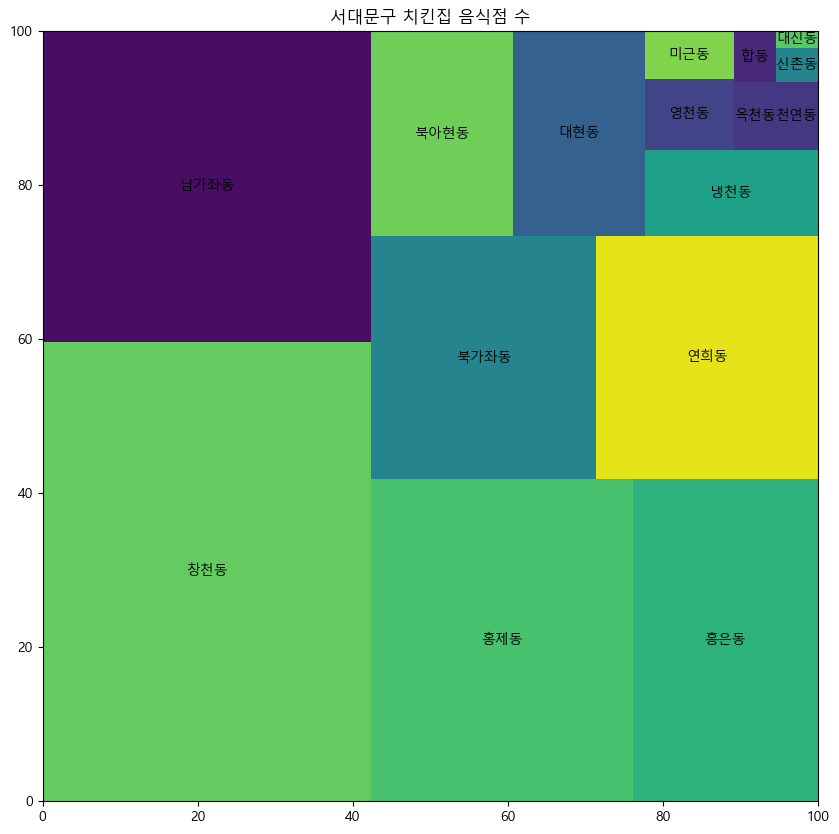

In [76]:
countChicken = chicken['동'].value_counts().reset_index()
countChicken.columns = ['동', '치킨집수']

# treemap 
sizes = countChicken['치킨집수']
label = countChicken['동']
plt.figure(figsize=(10, 10))
squarify.plot(sizes=sizes, label=label)
plt.title('서대문구 치킨집 음식점 수')
plt.show()

##### **서대문구 치킨집 분포 results**
###### 창천동, 남가좌동의 비율이 높음 
###### 창천동, 남가좌동을 연세대학교, 명지대학교 등의 대학가를 보유하고 있어 호프/통닭의 분포가 높은 것으로 예상
##

### **서대문구 음식점 분포 (전체)**

In [68]:
dong_count_df = dong_count.reset_index()
dong_count_df.columns = ['동', 'count']
fig = px.treemap(dong_count_df, path=['동'], values='count', title='서대문구 음식점 분포')
fig.show()

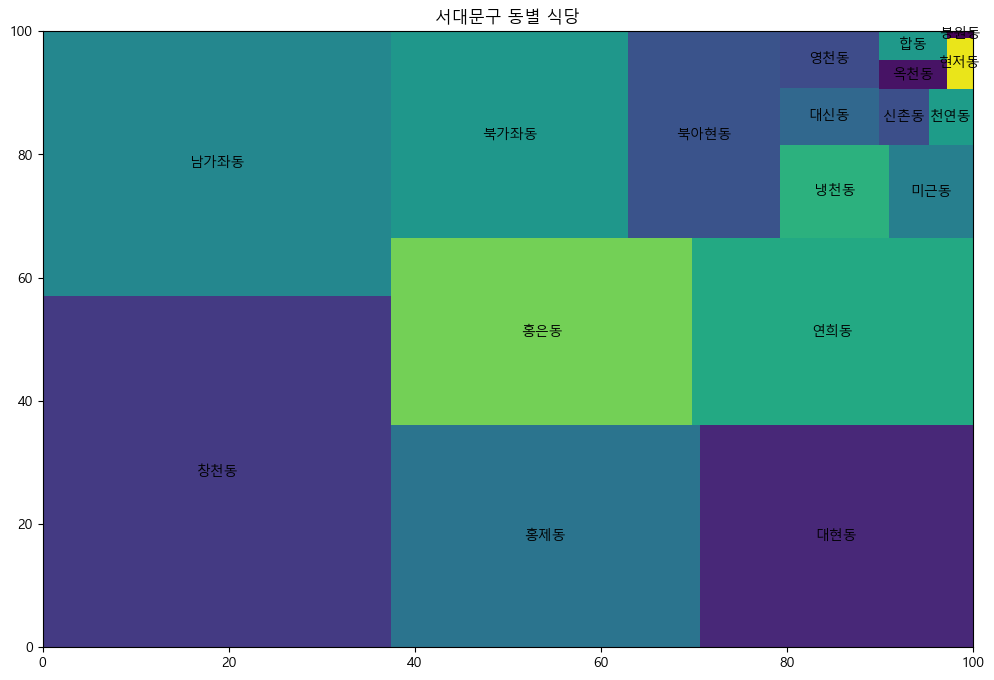

In [87]:
plt.figure(figsize=(12, 8))
squarify.plot(sizes=dong_count_df['count'], label=dong_count_df['동'])
plt.title('서대문구 동별 식당')
# plt.axis('off')
plt.show()

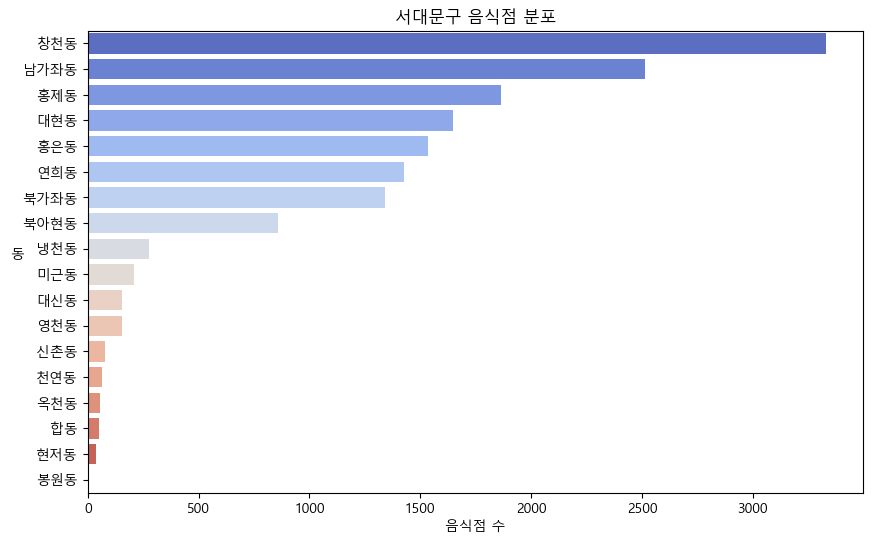

In [78]:
# '서대문구' Bar plot  
plt.figure(figsize=(10, 6))
sns.barplot(data=dong_count_df, x='count', y='동', palette='coolwarm')
plt.title('서대문구 음식점 분포')
plt.xlabel('음식점 수')
plt.ylabel('동',rotation=0)
plt.show()

### **구별 폐업 비율**

In [16]:
restaurant['영업상태명'].value_counts()

영업상태명
폐업       348707
영업/정상    124208
Name: count, dtype: int64

In [86]:
# 구별 영업 상태별 count 
status_counts = restaurant.groupby(['구', '영업상태명']).size().unstack(fill_value=0)

# 폐업 비율 계산
status_counts['폐업 비율'] = status_counts['폐업'] / (status_counts['영업/정상'] + status_counts['폐업'])

status_counts = status_counts.sort_values(by='폐업 비율', ascending=False).reset_index()

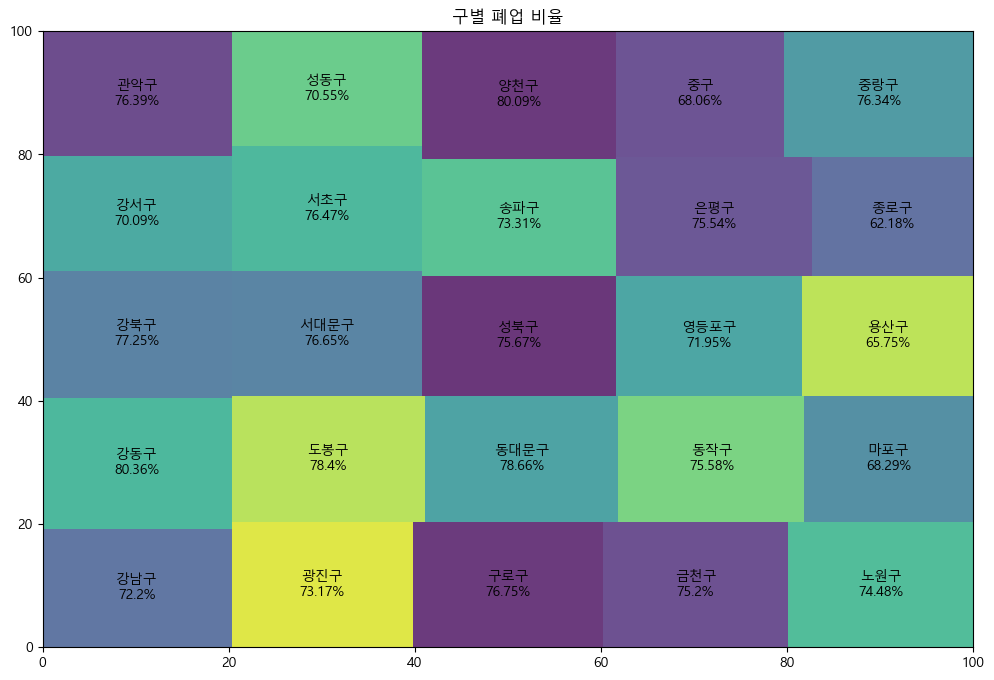

In [ ]:
# tree map
sizes = status_counts['폐업 비율']
labels = status_counts['구'] + '\n' + (status_counts['폐업 비율'] * 100).round(2).astype(str) + '%'

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=.8)
plt.title('구별 폐업 비율')
# plt.axis('off')
plt.show()

#### tree map으로 했는데 눈에 띄는 정보를 얻기 어려움..  다른 시각화로 다시 확인해보자! 

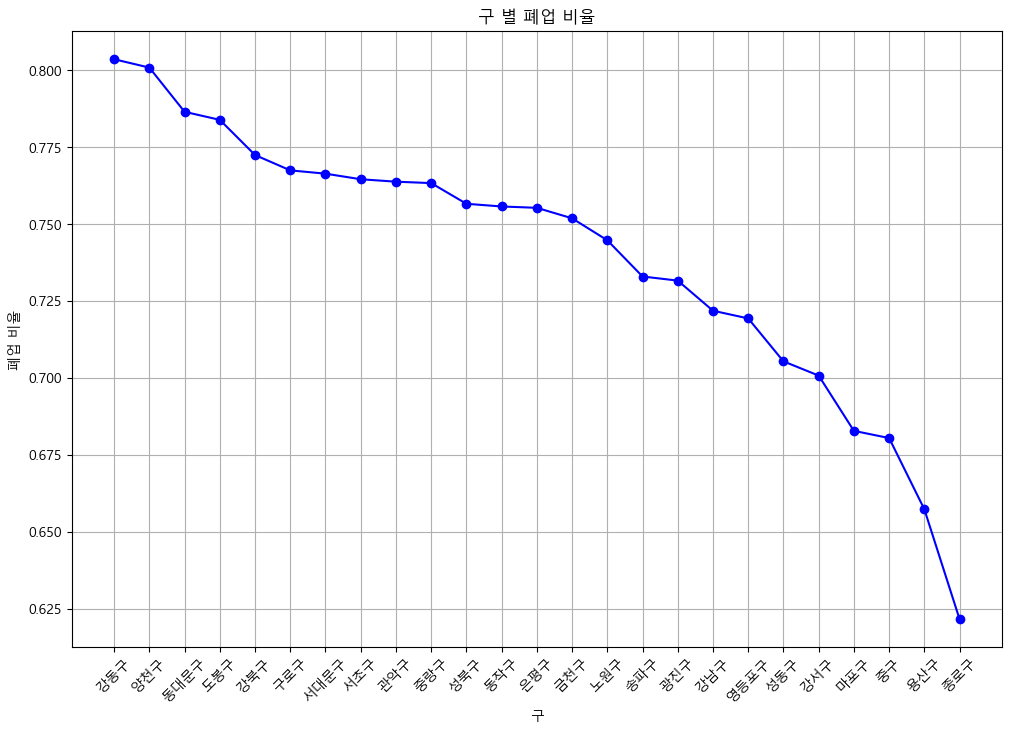

In [96]:
plt.figure(figsize=(12, 8))
plt.plot(status_counts['구'], status_counts['폐업 비율'], marker='o', linestyle='-', color='b')
plt.xlabel('구')
plt.ylabel('폐업 비율')
plt.title('구 별 폐업 비율')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### **구 별 폐업 비율 results**
###### 폐업 비율이 높을 수록 해당 구의 음식점이 폐업한 비중이 크다는 의미 
###### 강동구, 양천구, 동대문구의 폐업 비율이 상대적으로 높음 
###### 용산구, 종로구의 폐업 비율이 낮아 상대적으로 폐업 비중이 낮음을 알 수 있음. 
##

### **연도별 폐업/ 신규 등록 추이**

In [136]:
restaurant['인허가일자'].value_counts().tail()

인허가일자
1970-01-01 00:00:00.019760423    1
1970-01-01 00:00:00.019791129    1
1970-01-01 00:00:00.019730108    1
1970-01-01 00:00:00.019831002    1
1970-01-01 00:00:00.019970101    1
Name: count, dtype: int64

In [130]:
# '인허가일자'와 '폐업일자' 컬럼을 datetime 형식으로 변환
restaurant['인허가일자'] = pd.to_datetime(restaurant['인허가일자'])
restaurant['폐업일자'] = pd.to_datetime(restaurant['폐업일자'])

# 연도별로 그룹화하여 신규 등록 및 폐업 개수 계산
restaurant['인허가연도'] = restaurant['인허가일자'].dt.year
restaurant['폐업연도'] = restaurant['폐업일자'].dt.year

new_registrations = restaurant.groupby('인허가연도').size()
closures = restaurant.groupby('폐업연도').size()

###### 시계열 분석해보려고 했으나 인허가 일자 모두 1970-01-01로 통일되어있고,  폐업일자(null값이 너무 많음) 유의미한 값 찾기 불가 
###### > 이후 데이터를 찾아 디벨롭해보면 좋을듯

###  **업태 구분명 별 폐업 비율 (top10)**

In [99]:
restaurant['업태구분명'].value_counts().reset_index().head(10)

,업태구분명,count
0,한식,199636
1,분식,78686
2,경양식,47856
3,호프/통닭,34910
4,기타,32911
5,일식,17716
6,중국식,14808
7,정종/대포집/소주방,12753
8,통닭(치킨),9547
9,까페,7889


In [113]:
# 업태구분명 별 영업상태명 count
type_counts = restaurant.groupby(['업태구분명', '영업상태명']).size().unstack(fill_value=0)

type_counts['폐업 비율'] = type_counts['폐업'] / (type_counts['영업/정상'] + type_counts['폐업'])

type_counts = type_counts.sort_values(by='폐업 비율', ascending=True).reset_index().head(10)

In [115]:
# type_counts.head(10)

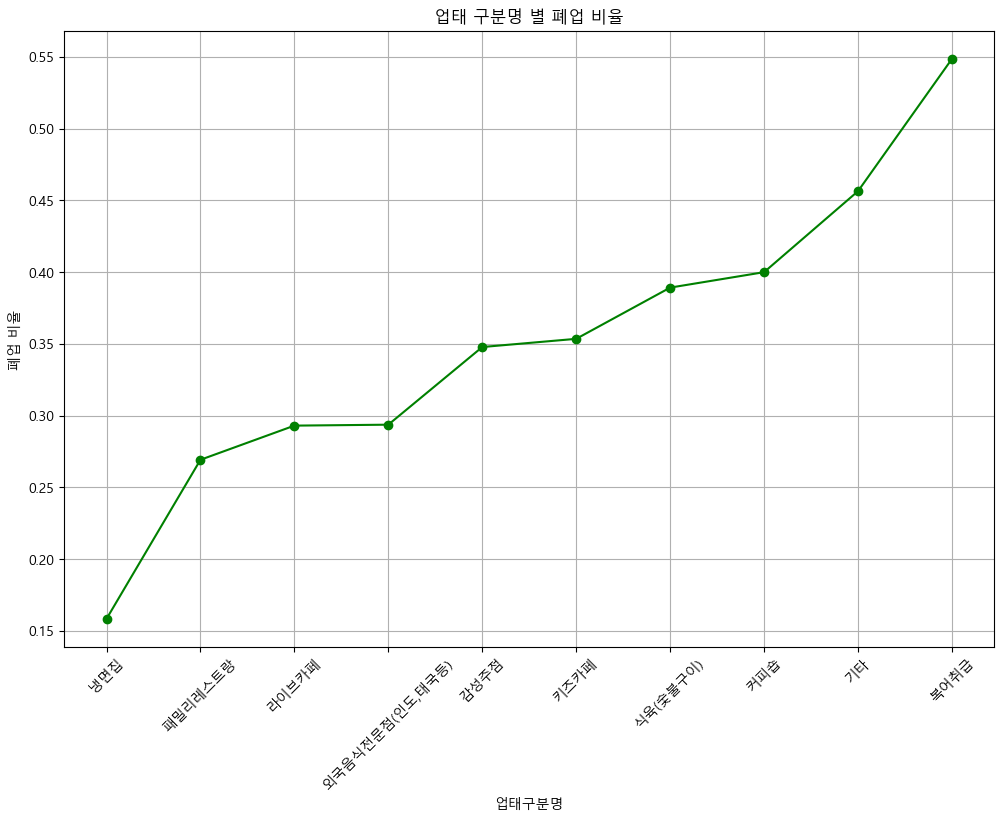

In [123]:
plt.figure(figsize=(12, 8))
plt.plot(type_counts['업태구분명'], type_counts['폐업 비율'], marker='o', linestyle='-', color='g')
plt.xlabel('업태구분명')
plt.ylabel('폐업 비율')
plt.title('업태 구분명 별 폐업 비율')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### **업태 구분명에 따른 폐업 비율 results**
###### 비율이 낮을 수록 폐업 비율이 낮은 TOP10개의 음식점을 뽑아봄. 
######  냉면집, 페밀리 레스토랑 등 가족이 함께 즐기는 식당은 상대적으로 안정적인 수요를 유지하며 폐업 비율이 낮은 것으로 보임 
###### 커피숍, 북어취급 등 경쟁이 심하거나 특정 계절/환경에 의존하는 경우가 많아 폐업 비율이 높은 것으로 추측됨. 
##

### **서울시 음식점 업종 별 시각화**

In [147]:
# (1) 영업 중인 사업장 필터링 
# (2) 업태 구분명의 재 분류(음식점, 주류, 카페) 따라서 지도에 띄운 사업자명(음식점들) 지도에 표시 
# (3) folium 사용하여 지도에 표시

In [26]:
# 영업 중인 사업장 필터링
operating_restaurants = restaurant[restaurant['영업상태명'] == '영업/정상']
operating_restaurants['업태구분명'].value_counts().reset_index().head(10)

,업태구분명,count
0,한식,53385
1,기타,17900
2,호프/통닭,10533
3,경양식,9457
4,분식,9400
5,일식,6206
6,중국식,4628
7,통닭(치킨),2577
8,정종/대포집/소주방,2282
9,까페,2115


In [27]:
operating_restaurants['업태구분명'].unique()

array(['한식', '일식', '분식', '기타', '출장조리', '식육(숯불구이)', '중국식', '경양식', '호프/통닭',
       '까페', '정종/대포집/소주방', '뷔페식', '김밥(도시락)', '통닭(치킨)', '횟집', '패밀리레스트랑',
       '감성주점', '외국음식전문점(인도,태국등)', '라이브카페', '복어취급', '키즈카페', '패스트푸드',
       '탕류(보신용)', '냉면집', '커피숍', nan, '전통찻집', '이동조리'], dtype=object)

In [29]:
operating_restaurants['업태구분명'] = operating_restaurants['업태구분명'].replace('193959.150482967', np.nan)
operating_restaurants.dropna(subset=['업태구분명'], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_3324\4049979106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operating_restaurants['업태구분명'] = operating_restaurants['업태구분명'].replace('193959.150482967', np.nan)
C:\Users\user\AppData\Local\Temp\ipykernel_3324\4049979106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operating_restaurants.dropna(subset=['업태구분명'], inplace=True)


In [32]:
# 업태구분명 > 종류 : 음식점, 주점, 카페로 구분 
def classify_type(value):
    if value in ['한식', '일식', '분식', '기타', '출장조리', '식육(숯불구이)', '중국식', '경양식',
                 '뷔페식', '김밥(도시락)', '횟집', '패밀리레스트랑', '외국음식전문점(인도,태국등)',
                 '탕류(보신용)', '냉면집', '전통찻집', '일반조리판매', '기타 휴게음식점']:
        return '음식점'
    elif value in ['호프/통닭', '정종/대포집/소주방', '감성주점', '라이브카페', '복어취급', '룸살롱', '간이주점']:
        return '주점'
    elif value in ['까페', '키즈카페', '커피숍', '다방']:
        return '카페'
    else:
        return '기타'

operating_restaurants['종류'] = operating_restaurants['업태구분명'].apply(classify_type)
    

C:\Users\user\AppData\Local\Temp\ipykernel_3324\29703794.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operating_restaurants['종류'] = operating_restaurants['업태구분명'].apply(classify_type)


In [42]:
operating_restaurants['사업장명']

0            혼밥대왕 마곡점
1         꾸어가게생선구이화곡점
2               인생갈비탕
3         놀부 공유주방 선릉역
4                 온기정
             ...     
124203       청년치킨 수유점
124204           포마살롱
124205            우쿠야
124206            한일전
124207           정담초밥
Name: 사업장명, Length: 124197, dtype: object

In [43]:
# 각 종류별 사업장명 리스트로 묶어서 확인해보기  
matched_restaurants = operating_restaurants.groupby('종류')['사업장명'].apply(list).reset_index()

In [46]:
matched_restaurants

,종류,사업장명
0,기타,"[구이마을(두번째), 치르치르, 노랑통닭, 구어조은닭, 짝태 앤 노가리, 페리카나치..."
1,음식점,"[혼밥대왕 마곡점, 꾸어가게생선구이화곡점, 인생갈비탕, 놀부 공유주방 선릉역, 온기..."
2,주점,"[청, 우정식당, 비에이치씨 양평현대점, 짝퉁, 써브웨이 (광화문점), 교촌, 토크..."
3,카페,"[꽃샘, 유토피아 카페, 예스호프, 블루씨티, 갈채, 구할 구, 카밀라, 훔볼트아지..."


In [49]:
print(operating_restaurants['좌표정보(x)'])
print(operating_restaurants['좌표정보(y)'])
# 좌표 정보가 folium에서활용할수없는 형태로 되어있음 변환 해줘야함 

0                   NaN
1         187499.286366
2         204044.789949
3         204603.136055
4         205210.358779
              ...      
124203    201931.867791
124204    201426.990008
124205    202337.752769
124206    203057.772890
124207    204425.164395
Name: 좌표정보(x), Length: 124197, dtype: float64
0                   NaN
1         448069.583478
2         444529.840427
3         444606.621961
4         445154.422252
              ...      
124203     460104.86529
124204    458117.938178
124205    456677.031196
124206    455184.794972
124207    457259.003811
Name: 좌표정보(y), Length: 124197, dtype: object


In [62]:
import folium
from folium.plugins import MarkerCluster
from pyproj import Transformer

In [51]:
# 변환 start
transformer = Transformer.from_crs("EPSG:5181", "EPSG:4326", always_xy=True)

# operating_restaurants의 좌표 변환
operating_restaurants[['경도', '위도']] = operating_restaurants.apply(
    lambda row: pd.Series(transformer.transform(row['좌표정보(x)'], row['좌표정보(y)'])),
    axis=1
)

C:\Users\user\AppData\Local\Temp\ipykernel_3324\2914359106.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operating_restaurants[['경도', '위도']] = operating_restaurants.apply(
C:\Users\user\AppData\Local\Temp\ipykernel_3324\2914359106.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operating_restaurants[['경도', '위도']] = operating_restaurants.apply(


In [63]:
# 결측치처리
operating_restaurants_clean = operating_restaurants.dropna(subset=['위도', '경도'])

# 너무 많아서 자꾸 터지길래 data sampling (터짐방지)
sampled_restaurants = operating_restaurants_clean.sample(1000, random_state=42)


seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)
marker_cluster = MarkerCluster().add_to(seoul_map)

color_map = {
    '음식점': 'green',
    '주점': 'red',
    '카페': 'orange'
}

# 샘플링된 데이터로 Marker 추가
for _, row in sampled_restaurants.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['사업장명'],
         # 기본값은 파란색
        icon=folium.Icon(color=color_map.get(row['종류'], 'blue')) 
    ).add_to(marker_cluster)


In [67]:
# 각 Marker 구분을 위한 legend label 추가해서 보기 편하게 
legend_html = '''
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 150px; height: 110px; 
    background-color: white; z-index:9999; font-size:14px;
    border:1px solid black; padding: 10px;
">
    <b>구분</b><br>
    <i style="background:green; width:10px; height:10px; display:inline-block;"></i> 음식점<br>
    <i style="background:red; width:10px; height:10px; display:inline-block;"></i> 주점<br>
    <i style="background:orange; width:10px; height:10px; display:inline-block;"></i> 카페<br>
</div>
'''
seoul_map.get_root().html.add_child(folium.Element(legend_html))

In [68]:
seoul_map